In [ ]:
from collections import Counter, defaultdict

import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_md")

from text_operations import TextPreprocessor

In [ ]:
df = pd.read_csv("../../data_collection/data/labelled/academic_data_3.csv")
df.head(3)

,uni_name,pgm_name,dur_yrs,type,national_rank_qs,dept_involved,location,url,descr,header_tag,...,Data Representation and Transformation,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Not determinable,country,gds_mean,gds_stdev,band
0,Indian Institute of Science Bangalore,M.Tech. Computational and Data Science,2,Public,2,Department of Computational and Data Sciences,Karnataka,http://cds.iisc.ac.in/admissions/course-degrees/,Computational Science and Data Science are int...,"['h1', 'h2', 'h3']",...,0.272727,0.454545,0.090909,0.090909,0.000000,0.0,India,0.166667,0.166804,Band 3
1,Indian Institute of Science Bangalore,M.Tech. Artificial Intelligence,2,Public,2,Departments of Computer Science and Automation...,Karnataka,https://eecs.iisc.ac.in/mtechai/,Artificial Intelligence has captured the ima...,"['h1', 'h2']",...,0.235294,0.470588,0.294118,0.000000,0.000000,0.0,India,0.166667,0.198321,Band 3
2,University of Hyderabad,MBA Business Analytics,2,Public,8,School of Management Studies,Telangana,https://smsuoh.ac.in/mba/mba-business-analytics/,The School has launched a two year MBA in Bus...,"['h2', 'h4']",...,0.185714,0.357143,0.157143,0.157143,0.014286,0.0,India,0.166667,0.110902,Band 2


In [ ]:
def get_degree(x):
    
    x = x.replace('(STEM)', '')
    if ' in ' in x.lower() and 'specialization' not in x.lower():
        temp = x.split(' in ')
    else:
        temp = x.split()

    subject = " ".join(temp[1:])
    return subject

def get_degree_2(x, sym):

    if sym in x.lower():
        temp = x.split(sym)
        subject = " ".join(temp[1:])
        
    else:
        subject = x

    subject = subject.replace(')', '').strip()
    
    return subject


In [ ]:
degrees = df.pgm_name.apply(get_degree)
degrees = degrees.apply(lambda x: get_degree_2(x, ' in '))
degrees = degrees.apply(lambda x: get_degree_2(x, ' - '))
degrees = degrees.apply(lambda x: get_degree_2(x, ' ('))
degrees = degrees.apply(lambda x: get_degree_2(x, 'of Science '))
degrees = degrees.apply(lambda x: get_degree_2(x, 'of '))
degrees = list(degrees)
degrees = sorted(degrees, key=len)

df['subject'] = degrees

In [ ]:
def process_subject(i):
    alloted = False
    sub = []
    if 'data science' in i.lower():
        alloted = True
        sub.append('Data Science')
    if 'business analytics' in i.lower():
        alloted = True
        sub.append('Business Analytics')
    if ('analytics' in i.lower() or 'analysis' in i.lower()) and 'business analytics' not in i.lower():
        alloted = True
        sub.append('Analytics')
    if 'machine learning' in i.lower() or ' ml ' in i.lower():
        alloted = True
        sub.append('Machine Learning')
    if 'artificial intelligence' in i.lower() or ' ai ' in i.lower():
        alloted = True
        sub.append('Artificial Intelligence')
    if 'statistics' in i.lower():
        alloted = True
        sub.append('Statistics')
    if alloted == False:
        sub.append('Misc')
    return ", ".join(sub)

df['subject'] = df.subject.apply(process_subject)

In [ ]:
df.head()

,uni_name,pgm_name,dur_yrs,type,national_rank_qs,dept_involved,location,url,descr,header_tag,...,Computing with Data,Data Modeling,Data Visualization and Presentation,Science about Data Science,Not determinable,country,gds_mean,gds_stdev,band,subject
0,Indian Institute of Science Bangalore,M.Tech. Computational and Data Science,2,Public,2,Department of Computational and Data Sciences,Karnataka,http://cds.iisc.ac.in/admissions/course-degrees/,Computational Science and Data Science are int...,"['h1', 'h2', 'h3']",...,0.454545,0.090909,0.090909,0.000000,0.0,India,0.166667,0.166804,Band 3,Analytics
1,Indian Institute of Science Bangalore,M.Tech. Artificial Intelligence,2,Public,2,Departments of Computer Science and Automation...,Karnataka,https://eecs.iisc.ac.in/mtechai/,Artificial Intelligence has captured the ima...,"['h1', 'h2']",...,0.470588,0.294118,0.000000,0.000000,0.0,India,0.166667,0.198321,Band 3,Analytics
2,University of Hyderabad,MBA Business Analytics,2,Public,8,School of Management Studies,Telangana,https://smsuoh.ac.in/mba/mba-business-analytics/,The School has launched a two year MBA in Bus...,"['h2', 'h4']",...,0.357143,0.157143,0.157143,0.014286,0.0,India,0.166667,0.110902,Band 2,Analytics
3,University of Hyderabad,M.Tech. Artificial Intelligence,2,Public,8,School of Computer and Information Sciences,Telangana,https://scis.uohyd.ac.in/Academic/Programmes/m...,M.Tech Artificial Intelligence is also a four...,['h2'],...,0.700000,0.000000,0.100000,0.000000,0.0,India,0.166667,0.273252,Band 3,Analytics
4,IIT Guwahati,M.Tech Data Science,2,Public,10,Departments of Computer Science and Engineerin...,Assam,https://www.iitg.ac.in/ds/,Data Science is gaining prominence in academi...,Not inferred,...,0.419355,0.225806,0.064516,0.000000,0.0,India,0.166667,0.162469,Band 2,Data Science


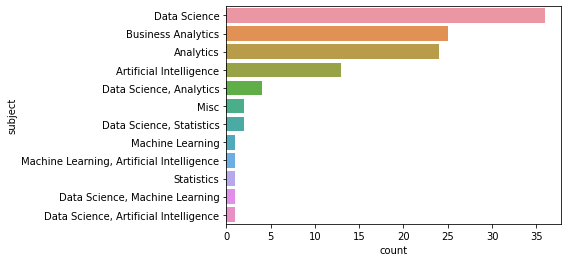

In [ ]:
sns.countplot(data = df, y = 'subject', order = df['subject'].value_counts().index)
plt.show()

In [ ]:
depts = list(df.dept_involved)
depts = [dept.split(" of ")[1] if " of " in dept else dept for dept in depts]
depts = [dept.split(",")[1].strip() if "," in dept else dept for dept in depts]
#depts = [dept.split("and")[1].strip() if "and" in dept else dept for dept in depts]

df['dept'] = depts

In [ ]:
def process_dept(x):
    sub = []
    alloted = False
    if 'management' in x.lower() or 'business' in x.lower() or 'commerce' in x.lower():
        alloted = True
        sub.append('Management-related')
    if 'computer' in x.lower() or 'engineering' in x.lower() or 'info' in x.lower():
        alloted = True
        sub.append('Engineering-related')
    if 'data' in x.lower() or 'artificial intelligence' in x.lower() or 'machine learning' in x.lower():
        alloted = True
        sub.append('Data-related')
    if 'statistics' in x.lower() or 'math' in x.lower():
        alloted = True
        sub.append('Statistics-related')
    if 'social' in x.lower() or 'socio' in x.lower() or 'public' in x.lower() or 'politics' in x.lower():
        alloted=True
        sub.append('Social-related')
    if alloted == False:
        return 'Other'
    return ", ".join(sub)

df['dept_cat'] = df['dept'].apply(process_dept)

In [ ]:
df.head()

,uni_name,pgm_name,dur_yrs,type,national_rank_qs,dept_involved,location,url,descr,header_tag,...,Data Visualization and Presentation,Science about Data Science,Not determinable,country,gds_mean,gds_stdev,band,subject,dept,dept_cat
0,Indian Institute of Science Bangalore,M.Tech. Computational and Data Science,2,Public,2,Department of Computational and Data Sciences,Karnataka,http://cds.iisc.ac.in/admissions/course-degrees/,Computational Science and Data Science are int...,"['h1', 'h2', 'h3']",...,0.090909,0.000000,0.0,India,0.166667,0.166804,Band 3,Analytics,Computational and Data Sciences,Data-related
1,Indian Institute of Science Bangalore,M.Tech. Artificial Intelligence,2,Public,2,Departments of Computer Science and Automation...,Karnataka,https://eecs.iisc.ac.in/mtechai/,Artificial Intelligence has captured the ima...,"['h1', 'h2']",...,0.000000,0.000000,0.0,India,0.166667,0.198321,Band 3,Analytics,Electrical Communication Engineering,Engineering-related
2,University of Hyderabad,MBA Business Analytics,2,Public,8,School of Management Studies,Telangana,https://smsuoh.ac.in/mba/mba-business-analytics/,The School has launched a two year MBA in Bus...,"['h2', 'h4']",...,0.157143,0.014286,0.0,India,0.166667,0.110902,Band 2,Analytics,Management Studies,Management-related
3,University of Hyderabad,M.Tech. Artificial Intelligence,2,Public,8,School of Computer and Information Sciences,Telangana,https://scis.uohyd.ac.in/Academic/Programmes/m...,M.Tech Artificial Intelligence is also a four...,['h2'],...,0.100000,0.000000,0.0,India,0.166667,0.273252,Band 3,Analytics,Computer and Information Sciences,Engineering-related
4,IIT Guwahati,M.Tech Data Science,2,Public,10,Departments of Computer Science and Engineerin...,Assam,https://www.iitg.ac.in/ds/,Data Science is gaining prominence in academi...,Not inferred,...,0.064516,0.000000,0.0,India,0.166667,0.162469,Band 2,Data Science,Electronics and Electrical Engineering and Mat...,"Engineering-related, Statistics-related"


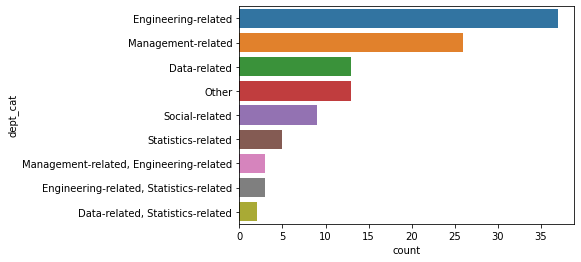

In [ ]:
sns.countplot(y='dept_cat', data=df, order = df['dept_cat'].value_counts().index)
plt.show()

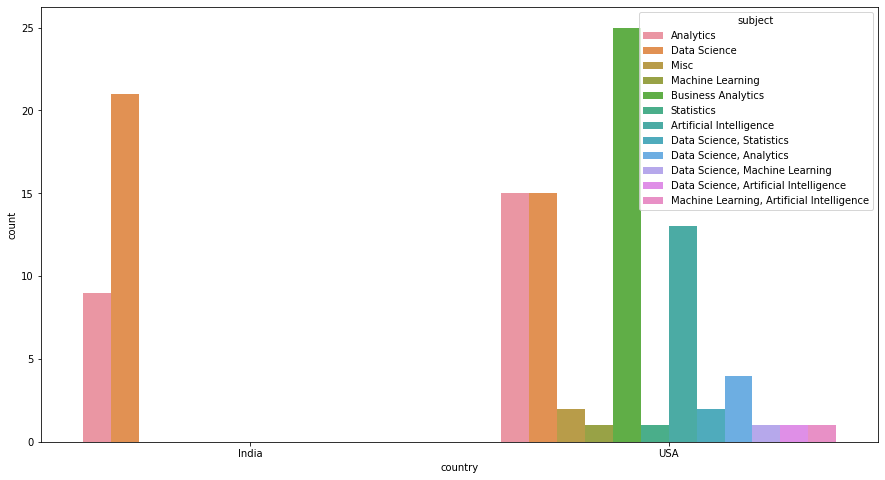

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='country', data=df, hue='subject')
plt.show()

<AxesSubplot:xlabel='gds_stdev', ylabel='country'>

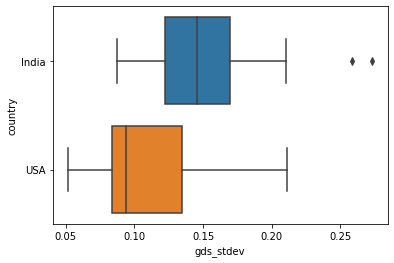

In [ ]:
sns.boxplot(data=df, x='gds_stdev', y='country')

<AxesSubplot:xlabel='gds_stdev', ylabel='dept_cat'>

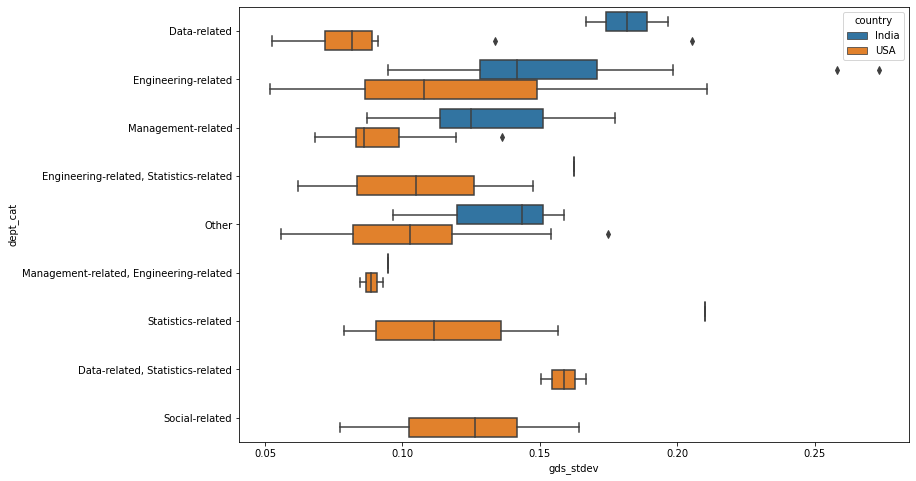

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='gds_stdev', y='dept_cat', hue='country')

<AxesSubplot:xlabel='gds_stdev', ylabel='country'>

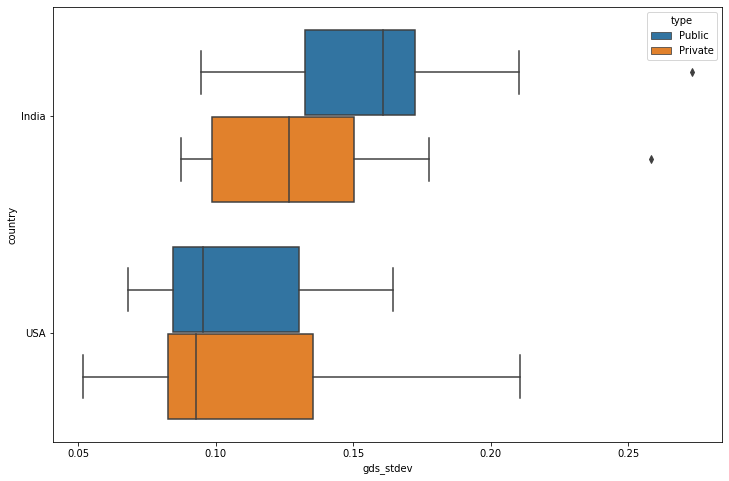

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='gds_stdev', y='country', hue='type')

<AxesSubplot:xlabel='gds_stdev', ylabel='subject'>

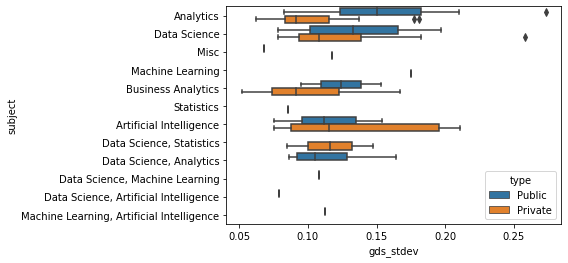

In [ ]:
sns.boxplot(data=df, x='gds_stdev', y='subject', hue='type') # does not necessarily make sense

In [ ]:
temp = df.groupby(['subject', 'dept_cat'], as_index=False).agg({'uni_name': 'count', 'gds_stdev': 'median'}).sort_values(by='gds_stdev')
temp[(temp.uni_name > 1) & (temp.dept_cat != 'Other') & (temp.subject != 'Misc')] # atleast 2 programs

,subject,dept_cat,uni_name,gds_stdev
13,Business Analytics,Data-related,7,0.073142
9,Artificial Intelligence,Management-related,2,0.085644
23,Data Science,Management-related,7,0.086586
3,Analytics,Management-related,10,0.093277
24,Data Science,"Management-related, Engineering-related",2,0.093722
16,Business Analytics,Management-related,5,0.107539
11,Artificial Intelligence,Social-related,3,0.111803
15,Business Analytics,Engineering-related,4,0.124886
0,Analytics,Data-related,2,0.125223
18,Business Analytics,Social-related,3,0.126381


In [ ]:
df['year_pub'] = df.date_pub.apply(lambda x: pd.to_datetime(x).year if x != 'Not inferred' else x)
df['year_last_mod'] = df.date_last_mod.apply(lambda x: pd.to_datetime(x).year if x != 'Not inferred' else x)

<AxesSubplot:xlabel='gds_stdev', ylabel='year_pub'>

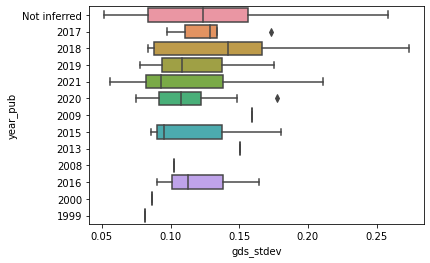

In [ ]:
sns.boxplot(data=df, y='year_pub', x='gds_stdev')

<AxesSubplot:xlabel='count', ylabel='year_pub'>

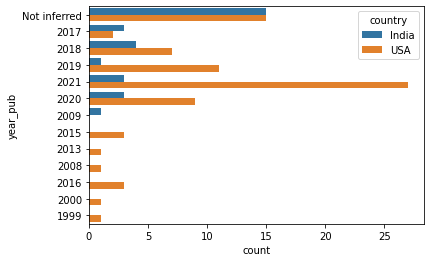

In [ ]:
sns.countplot(data=df, y='year_pub', hue='country')

<AxesSubplot:xlabel='count', ylabel='year_last_mod'>

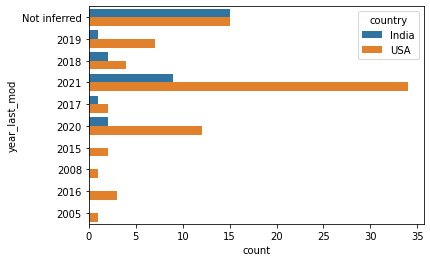

In [ ]:
sns.countplot(data=df, y='year_last_mod', hue='country')

<AxesSubplot:xlabel='count', ylabel='year_last_mod'>

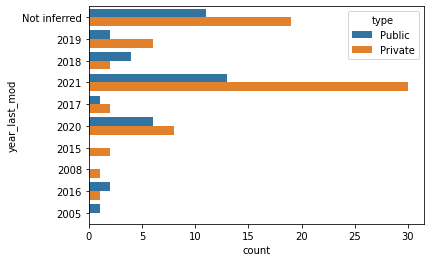

In [ ]:
sns.countplot(data=df, y='year_last_mod', hue='type')

In [ ]:
test_doc = df.descr[0]
tp = TextPreprocessor(test_doc)
print(tp.preprocess_text())

computational science data science interdisciplinary areas bring domain specific knowledge science engineering relevant areas computing systems formal foundations computational science investigates scientific computing applications require mathematical techniques parallel computing data science explores dataintensive applications use scalable statistical machine learning methods big data cloud platforms impart foundational scalable systems skills computational data sciences advanced courses selected students allow specialization methods platforms applications


def __init__(self, text):
        self.text = text
        self.doc = nlp(text)
        self.sentences = re.split(r' *[\.\?!][\'"\)\]]*[ |\n](?=[A-Z])', self.text)
        self.words = []

    def count_units(self):
        self.char_cnt = len(self.text)
        self.syll_cnt = textstat.syllable_count(self.text)
        self.word_cnt = textstat.lexicon_count(self.text)
        self.sent_cnt = textstat.sentence_count(self.text)
    

    def digits_cnt(self):
        return None

    def puncts_cnt(self):
        return None

    def mean_chars_per_word(self):
        self.mean_chars_per_word = self.char_cnt

    def median_chars_per_word(self):
        return None    

    def mean_words_per_sent(self):
        return None

    def median_words_per_sent(self):
        return None 

    def mean_syll_per_sent(self):
        return None

    def median_syll_per_sent(self):
        return None    
    
    def flesch_kincaid_readability(self):
        self.flesch_kincaid = textstat.flesch_kincaid_grade(self.text)

    def dale_chall_readability(self):
        self.dale_chall = textstat.dale_chall_readability_score(self.text)

    def lexical_diversity_mtld(self):
        return None

    def noun_cnt(self):
        return None

    def verb_cnt(self):
        return None
    
    def adj_cnt(self):
        return None

In [ ]:
len(tp.preprocess_text())

565

In [ ]:
doc = nlp(test_doc)
tokens = [token for token in doc]

In [ ]:
import textstat
textstat.lexicon_count(test_doc)

87

In [ ]:
len(tokens)    

96

In [ ]:
words = [tok for tok in tokens if not(tok.is_punct or tok.is_digit)]
len(words)

88

In [ ]:
[tok for tok in tokens if (tok.is_punct or tok.is_digit)]

[., ,, -, ., ,, ,, ,, .]

In [ ]:
tok = tokens[0]
print(tok.lex)
print(tok.sent)
print(tok.text)
print(tok.ent_type_)
print(tok.lemma_)
print(tok.norm_)
print(tok.lower_)
print(tok.is_alpha)
print(tok.is_digit)
print(tok.is_punct)
print(tok.like_num)
print(tok.is_stop)
print(tok.pos_)
print(tok.tag_)
print(tok.morph)
print(tok.morph.get("Number"))
print(tok.sentiment)

Computational Science and Data Science are interdisciplinary areas that bring together the domain specific knowledge of science and engineering with relevant areas of computing systems and formal foundations.
Computational

Computational
computational
computational
True
False
False
False
False
PROPN
NNP
NounType=Prop|Number=Sing
['Sing']
0.0


In [ ]:
[token for token in doc if token.pos_ == "ADV"]

[together]

In [ ]:
from text_operations import ComplexityComputer

In [ ]:
c = ComplexityComputer(test_doc)

In [ ]:
df.loc[1, 'descr']

"  Artificial Intelligence has captured the imagination of the entire world with its potential ability to solve complex societal problems of our times: universal access to healthcare and education, efficient transportation, increased efficiency in providing e-governance services to the public, etc. Focused national efforts are underway in many countries. The Government of India has initiated widespread discussion on how India should strive to be among the top nations in the world in the AI ecosystem. The two-year M.Tech. in Artificial Intelligence aims to fill the critical needs of the industry and to fill the gap in the availability of high-end AI scientists and engineers.�The vision of the M.Tech. (AI) program is to impart rigorous training in the foundations and deep technology of Artificial Intelligence to produce graduates who can become world leaders in AI and lead India's march towards leadership in this important area. Curriculum tailored to bring students to the forefront of A

In [ ]:
textual_complexity_df = ComplexityComputer(df.loc[0, 'descr']).get_complexity_measures()
for idx in range(1, df.shape[0]):
    temp = ComplexityComputer(df.loc[idx, 'descr']).get_complexity_measures()
    textual_complexity_df = pd.concat([textual_complexity_df, temp])

textual_complexity_df = textual_complexity_df.reset_index(drop=True)

In [ ]:
df = pd.merge(df, textual_complexity_df, left_on='descr', right_on='text')
df = df.drop('text', axis=1)

In [ ]:
df

,uni_name,pgm_name,dur_yrs,type,national_rank_qs,dept_involved,location,url,descr,header_tag,...,mean_words_per_sent,median_words_per_sent,common_nouns_cnt,proper_nouns_cnt,adjectives_cnt,verbs_cnt,numerals_cnt,flesch_kincaid,dale_chall,mtld
0,Indian Institute of Science Bangalore,M.Tech. Computational and Data Science,2,Public,2,Department of Computational and Data Sciences,Karnataka,http://cds.iisc.ac.in/admissions/course-degrees/,Computational Science and Data Science are int...,"['h1', 'h2', 'h3']",...,29.333333,28.0,32,7,15,8,0,21.7,11.61,46.951849
1,Indian Institute of Science Bangalore,M.Tech. Artificial Intelligence,2,Public,2,Departments of Computer Science and Automation...,Karnataka,https://eecs.iisc.ac.in/mtechai/,Artificial Intelligence has captured the ima...,"['h1', 'h2']",...,18.769231,18.0,71,23,27,24,4,14.6,10.41,79.344978
2,University of Hyderabad,MBA Business Analytics,2,Public,8,School of Management Studies,Telangana,https://smsuoh.ac.in/mba/mba-business-analytics/,The School has launched a two year MBA in Bus...,"['h2', 'h4']",...,17.458333,13.5,124,69,25,34,8,17.5,9.27,59.886627
3,University of Hyderabad,M.Tech. Artificial Intelligence,2,Public,8,School of Computer and Information Sciences,Telangana,https://scis.uohyd.ac.in/Academic/Programmes/m...,M.Tech Artificial Intelligence is also a four...,['h2'],...,20.333333,23.0,19,3,6,6,3,14.4,9.76,67.280000
4,IIT Guwahati,M.Tech Data Science,2,Public,10,Departments of Computer Science and Engineerin...,Assam,https://www.iitg.ac.in/ds/,Data Science is gaining prominence in academi...,Not inferred,...,11.357143,10.0,59,8,14,19,5,10.1,9.24,80.397106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Pennsylvania State University,Master of Science in Data Analytics,2.0,Public,47,School of Graduate Professional Studies,University Park,https://bulletins.psu.edu/graduate/programs/ma...,Penn State Great Valley offers two graduate pr...,"['h1', 'h2', 'h3', 'h4']",...,30.166667,32.5,48,33,12,23,1,28.2,11.24,63.252841
113,"University of Maryland, College Park",Master of Professional Studies in Data Science...,2.0,Public,48,Office of Extended Studies,College Park,https://oes.umd.edu/professionals-post-baccala...,Engage in cutting-edge learning with the Unive...,"['h1', 'h4', 'h2']",...,23.500000,20.0,21,12,6,17,0,14.3,9.89,92.411667
114,"University of Maryland, College Park",Master of Science in Applied Political Analytics,Not inferred,Public,48,Department of Government and Politics,College Park,https://gvpt.umd.edu/landingtopic/ms-applied-p...,The Applied Political Analytics Program (APAN)...,['h4'],...,23.647059,24.0,114,20,44,51,6,16.5,10.13,103.114001
115,"University of Maryland, College Park",Master of Science in Business Analytics,1.5,Public,48,School of Business,College Park,https://www.rhsmith.umd.edu/programs/business-...,Discover the best ways to analyze big data in ...,"['h1', 'h2', 'h3']",...,29.222222,30.0,61,15,26,46,0,20.4,9.72,84.714525


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=596b9f0a-2431-4aa3-878c-95287ebfbe9a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>